In [3]:
# This cell is used for creating a button that hides/unhides code cells to quickly look only the results.
# Works only with Jupyter Notebooks.

import os
from IPython.display import HTML


HTML('''<script>
code_show=true;
function code_toggle() {
if (code_show){
$('div.input').hide();
} else {
$('div.input').show();
}
code_show = !code_show
}
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
import nltk
nltk.download('punkt')

from nltk import word_tokenize
from string import punctuation

[nltk_data] Downloading package punkt to /home/pullabs1/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [30]:
# Description:
#   Exercise7 notebook.
#
# Copyright (C) 2018 Santiago Cortes, Juha Ylioinas
#
# This software is distributed under the GNU General Public 
# Licence (version 2 or later); please refer to the file 
# Licence.txt, included with the software, for details.

# Preparations
import numpy as np

# Select data directory
if os.path.isdir('/coursedata'):
    # JupyterHub
    course_data_dir = '/coursedata'
elif os.path.isdir('../../../coursedata'):
    # Local installation
    course_data_dir = '../../../coursedata'
else:
    # Docker
    course_data_dir = '/home/jovyan/work/coursedata/'

print('The data directory is %s' % course_data_dir)
data_dir = os.path.join(course_data_dir, 'exercise-07-data')
print('Data stored in %s' % data_dir)

The data directory is /coursedata
Data stored in /coursedata/exercise-07-data


# CS-E4850 Computer Vision Exercise Round 7
The problems should be solved before the exercise session and solutions returned via
MyCourses. <br><br> For this exercise round, upload this notebook(pdf and .ipynb versions) containing your source codes (for Exercise 1) and your answer to the question of Exercise2, and all the answers to the questions of Exercise 3 (VGG practical), see part[1-3].ipynb. Note that it's not necessary to upload part1.ipynb, part2.ipynb or part3.ipynb, because all of the necessary questions related to them are contained in this notebook and you're not expected to do any coding in Exercises 2 and 3.

## Exercise 1 - Comparing  bags-of-words  with  tf-idf  weighting
Assume  that  we  have  an  indexed  collection  of  documents  containing  the  five  terms  of the following table where the second row indicates the percentage of documents in which each term appears.<br>

| term | cat | dog |mammals | mouse | pet |
| --- | :---: | :---: | :---: | :---: | :---: |
| **% of documents** | 5 | 20 | 2 | 10 | 60 |

Now, given the query $Q=\{mouse, cat, pet, mammals\}$, compute the similarity between $Q$ and the following example documents $D1$, $D2$, $D3$, by using the cosine similarity measure and tf-idf weights (i.e. term frequency - inverse document frequency) for the bag-of-words histogram representations of the documents and the query.

-  $D1$ = Cat is a pet, dog is a pet, and mouse may be a pet too.
-  $D2$ = Cat, dog and mouse are all mammals.
-  $D3$ = Cat and dog get along well, but cat may eat a mouse.

Ignore other words except the five terms, which are listed in the table above. You may proceed with the following steps:

a) Compute and report the inverse document frequency (idf) for each of the five terms. Use the logarithm with base 2.  (idf is the logarithm term on slide 69 of Lecture 6 where values $n_i/N$ are given in the table above.)<br>
b) Compute the term frequencies for the query and each document. <br>
c) Form the tf-idf weighted word occurrence histograms for the query and documents. <br>
d) Evaluate the cosine similarity between the query and each document (i.e.\ normalized scalar product between the weighted occurrence histograms as shown on slide 45).<br> 
e) Report the relative ranking of the documents. (You should get similarities 0.95, 0.64, and 0.63, but you need to determine which corresponds to which document.)<br>

## A) Compute and report the inverse document frequency (idf) for each of the five terms. 

In [38]:
## Comparing  bags-of-words  with  tf-idf  weighting
##--your-code-starts-here--##
# a.) idf for each of five terms.
terms = {'cat':0.05, 'dog':0.2 , 'mammals':0.02 , 'mouse':0.1,'pet':0.60}
idf = {key: np.log2(1/values) for key, values in terms.items()}
idf


{'cat': 4.321928094887363,
 'dog': 2.321928094887362,
 'mammals': 5.643856189774724,
 'mouse': 3.321928094887362,
 'pet': 0.7369655941662062}

## B) Term frequency for query and each document. 

In [32]:
# b) term frequency for query and each document.
Q = ['mouse', 'cat','pet','mammals']
D1 = "Cat is a pet, dog is a pet, and mouse may be a pet too."
D2 = "Cat, dog and mouse are all mammals."
D3 = "Cat and dog get along well, but cat may eat a mouse."

def clean(document):
    return[word.lower() for word in word_tokenize(document) if word not in punctuation]

v1 = clean(D1)
v2 = clean(D2)
v3 = clean(D3)

from collections import Counter

def build_tf(document):
    N = len(document)
    word_counts = Counter(document)
    tf = {word: round(count/N, 3) for word, count in word_counts.items()}
    return tf
tf_q = build_tf(Q)
print("Term Frequency for Query", tf_q)
tf_v1 = build_tf(v1)
print("Term Frequency for Document 1", tf_v1)
tf_v2 = build_tf(v2)
print("Term Frequency for Document 2", tf_v2)
tf_v3 = build_tf(v3)
print("Term Frequency for Document 3", tf_v3)


Term Frequency for Query {'mouse': 0.25, 'cat': 0.25, 'pet': 0.25, 'mammals': 0.25}
Term Frequency for Document 1 {'cat': 0.067, 'is': 0.133, 'a': 0.2, 'pet': 0.2, 'dog': 0.067, 'and': 0.067, 'mouse': 0.067, 'may': 0.067, 'be': 0.067, 'too': 0.067}
Term Frequency for Document 2 {'cat': 0.143, 'dog': 0.143, 'and': 0.143, 'mouse': 0.143, 'are': 0.143, 'all': 0.143, 'mammals': 0.143}
Term Frequency for Document 3 {'cat': 0.167, 'and': 0.083, 'dog': 0.083, 'get': 0.083, 'along': 0.083, 'well': 0.083, 'but': 0.083, 'may': 0.083, 'eat': 0.083, 'a': 0.083, 'mouse': 0.083}


## C) Form the tf-idf weighted word occurrence histograms for the query and documents. 

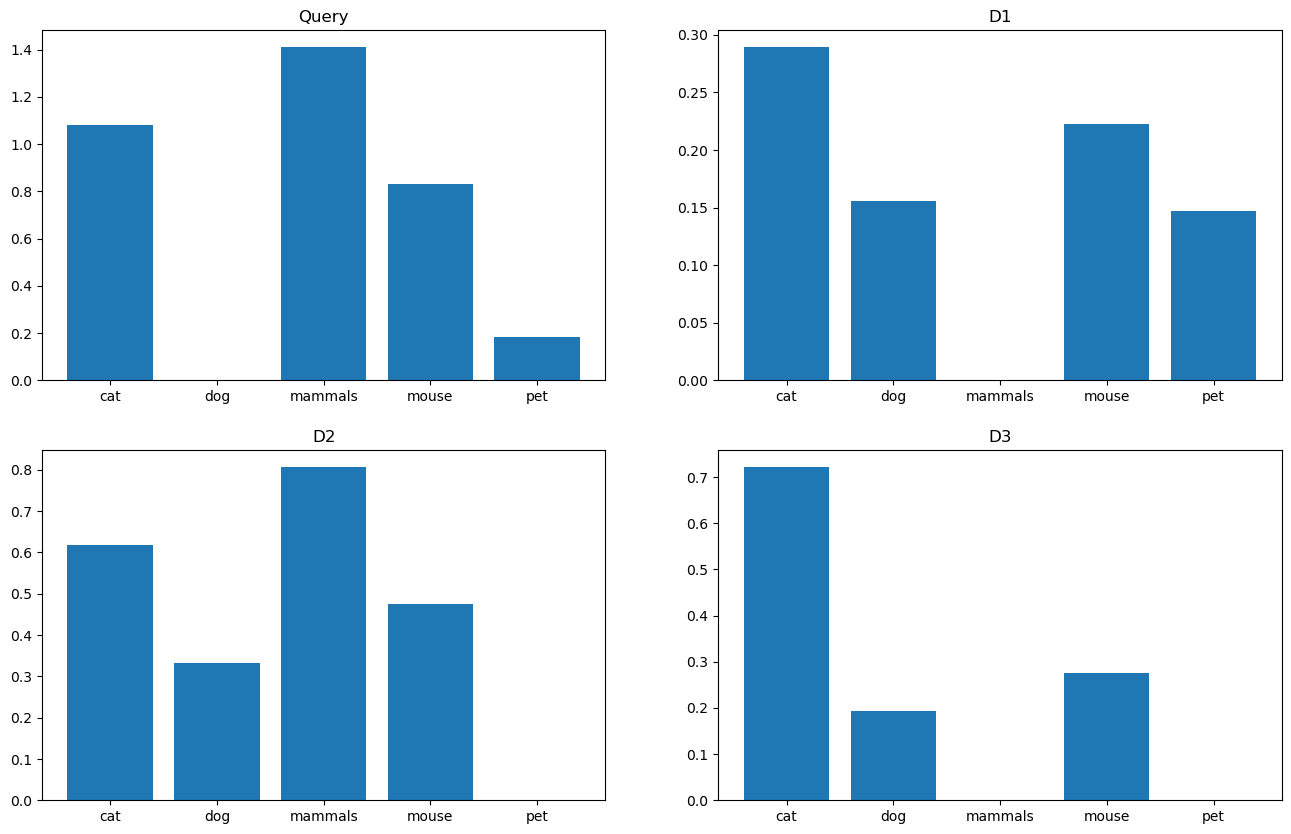

In [33]:
# c) Form the tf-idf weighted word occurrence histograms for the query and documents.
titles = ["Query" , "D1", "D2" , "D3"]

fig, axes = plt.subplots(figsize = (16,10), ncols =2, nrows=2)

tf_ls = [tf_q, tf_v1, tf_v2, tf_v3]
tf_idf_dict = {}

for i in range(len(tf_ls)):
    tf_idf = {names: 0 for names in terms}
    tf = tf_ls[i]
    
    for term in tf:
        if term in idf:
            tf_idf[term] = tf[term] * idf[term]
    
    tf_idf_dict[titles[i]] = tf_idf
    
    names = list(tf_idf.keys())
    values = list(tf_idf.values())
    
    axes[int(i/2)][i%2].bar(range(len(tf_idf)), values, tick_label=names)
    axes[int(i/2)][i%2].set_title(titles[i])
             

In [34]:
from pprint import pprint
pprint(tf_idf_dict)

{'D1': {'cat': 0.2895691823574533,
        'dog': 0.15556918235745326,
        'mammals': 0,
        'mouse': 0.22256918235745327,
        'pet': 0.14739311883324124},
 'D2': {'cat': 0.6180357175688928,
        'dog': 0.3320357175688928,
        'mammals': 0.8070714351377856,
        'mouse': 0.47503571756889273,
        'pet': 0},
 'D3': {'cat': 0.7217619918461896,
        'dog': 0.19272003187565107,
        'mammals': 0,
        'mouse': 0.2757200318756511,
        'pet': 0},
 'Query': {'cat': 1.0804820237218407,
           'dog': 0,
           'mammals': 1.410964047443681,
           'mouse': 0.8304820237218405,
           'pet': 0.18424139854155155}}


## D) Evaluate the cosine similarity between the query and each document. 

In [36]:

def sim(query, d):
    numerator = sum([d[term]*query[term] for term in query])
    denominator = np.sqrt(sum([d[term]**2 for term in d])) * np.sqrt(sum([query[term]**2 for term in query]))
    return numerator / denominator

print("Cosine similarity between Query and Document 1",sim(tf_idf_dict['Query'], tf_idf_dict['D1']))
 
print("Cosine similarity between Query and Document 2" , sim(tf_idf_dict['Query'], tf_idf_dict['D2']))

print("Cosine similarity between Query and Document 3" , sim(tf_idf_dict['Query'], tf_idf_dict['D3']))



Cosine similarity between Query and Document 1 0.6291036970635482
Cosine similarity between Query and Document 2 0.9546948111493485
Cosine similarity between Query and Document 3 0.6430077230767424


## E) Report the relative ranking of the documents. 

DOCUMENT 2 IS 0.95, DOCUMENT 3 IS 0.64, DOCUMENT 1 IS 0.63


## Exercise 2 - Precision  and  recall
There is a database of 10000 images and a user, who is only interested in images which contain a car. It is known that there are 500 such images in the database. An  automatic image retrieval system retrieves 300 car images and 50 other images from the database. Determine and report the precision and recall of the retrieval  system in this particular case.<br> 
(Hint: Precision and recall are explained on slide 67 of Lecture 6 and there is a good explanation also in Wikipedia.)

Type your answer here: 

Precision = true positive(TP) / true positive (TP) + false positive (FP) = 300/(300 + 50 )= 300/350 = 0.857

Recall = true positive (TP) / positive samples (P) = 300/500 = 0.6

## Exercise 3 - VGG practical on object instance recognition
See the questions in part[1-3].ipynb and write your answers here.

Part1:
Stage I.A (two questions)
Stage I.B (two questions)
Stage I.C (one question)

Part2 (one question)

Part3:
Stage III.A (three questions)
Stage III.B (one question)
Stage III.C (two questions)

Answering questions in part 1 corresponds to one bonus point and parts 2 and 3 together correspond to one additional point. Hence, in total this third task is worth of 2 points, whereas the previous tasks (Exercise 1 and Exercise 2) are both worth of 1 point so that in total this homework round is worth of 4 points.

Type your answers here: 

PART - 1 :

STAGE I.A 

1) Question: Note the change in density of detections across the image. Why does it change? Will it be a problem for matching? How could it be avoided?

ans: The change in the density of detections across the image is primarily due to variations in image content and structure. this is due to texture and contrast, gradient information and local features. While the change is not necessarily a probelm for matching, it can ffect the overall performance of feature matching and object recognition. This can be avoided by Adaptive parameter selection, thresholding and subsampling.

2) Question: Occasionally, a feature is detected multiple times, with different orientations. This may happen when the orientation assignment is ambiguous. Which kind of image structure would result in ambiguous orientation assignment?

ans:Ambiguous orientation assignment happens in regions with low gradients, repetitive patterns and low contrast. It results in keypoints with multiple possibel orientations. MAtching algorithms should handle these cases and consider multiple descriptors for each orientation.


STAGE I.B

1) Question: Note the descriptors are computed over a much larger region (shown in blue) than the detection (shown in green). Why?

ans: The descriptors are computed over the blue region which is larger than the detected which is green because the SIFT descriptors need a broader context to capture detailed image formation which makes them more robust for matching keypoints.

2) Question: Notice that there are many mismatches. Examine some of the mismatches to understand why the mistakes are being made. For example, is the change in lighting a problem? What additional constraints can be applied to remove the mismatches?

ans: Mismatches occur due to various reasons, including changes in lighting, similar local patterns, repeating structures and outliers. To remove mismatches we can apply distance ratioo filtering, RANSAC, Lowe's ratio test.


STAGE I.C

1) Question: Examine some of the remaining mismatches to understand why they have occurred. How could they be removed?

ans: with nnthreshold =0.8, some mismatches may occur due to repeating structures, outliers and nearby similar keypoints. To further remove mismatches we can apply geometeric constraints, filter out close keypoints and fine tune nnthreshold.



PART - 2:

1) Question: The transformation between the images induced by the plane is a planar homography. The detections are only affine co-variant (not as general as a planar homography). So how can descriptors computed on these detections possibly match?

ans: The descriptors computed by the detectors can match because they are designed to find regions that can be affected by foreshortening, perspective distortions and other transformations caused by changing viewpoints.


PART - 3: 

STAGE III - A:

1) Questions: The size of the vocabulary (the number of clusters) is an important parameter in visual word algorithms. How does the size affect the number of inliers and the difficulty of computing the transformation?

ans: Larger vocabulary can potentially lead to more inliner and also may increase the computational complexity of transformation calculation.

2) In the above procedure the time required to convert the descriptors into visual words was not accounted for. Why?

ans: Quantization of descriptors into visual words is typically a one-time preprocessing step and it's not part of the real-time image matching and is assumed to be precomputed.

3) What is the speedup in searching a large, fixed database of 10, 100, 1000 images?

ans: The speedup depends on factors like size of dataset, hardware and implementation efficiency. Visual words can speed up the search by reducing dimensionality and using efficent data structures. The exact speedup varies and needs empirical testing.


STAGE III - B:

1) Question: Why does the top image have a score of 1 (0.9698... see the NOTE above)?

ans: It indicates the retrieval system correctly identifies the top result as an image that is nearly identical to the query image. The high score indicates the strong similarity between the query image and top retrieved image.



STAGE III - C:

1) Question: Why is the top score much larger than 1 now?

ans: The top score is larger than 1 because it reflects the number of geometically verified inlier matches, which can be any positive integer. It quantifies the quality of matches, not just their presence.


2) Question: Are the retrieval results improved after geometric verification?

ans: YES, retrieval results are likely improved after geometric verification. It refines results by considering both visual similarity and geometric consistency reducing false positives and increasing retrieval accuracy.